<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Need)</span></div>

# What to expect in this chapter

# 1 A simple plot

## 1.1 Let’s look at some code.

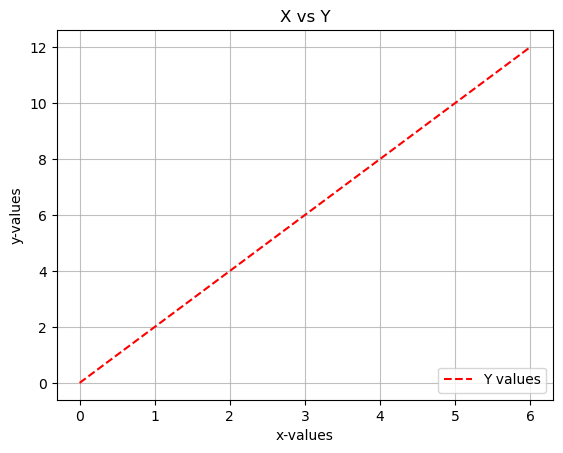

In [7]:
from matplotlib import pyplot as plt

# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

# Let's start plotting
plt.plot(x, y_1, label='Y values',         # colour and linestyle are optional arguments
         color='red', linestyle='dashed')
plt.xlabel('x-values')          # x and y axes names
plt.ylabel('y-values')
plt.title('X vs Y')             # changes the title
plt.grid(alpha=.8)              # changes the transparency of the grid lines
plt.legend(loc='lower right')   # changes the location of the legend

### Things to note

**Abbreviations**

|**Long Form**|**Abbreviation**|
|:--:         |:--:            |
|`color`      |`c`             |
|`linestyle`  |`ls`            |
|`linewidth`  |`lw`            |

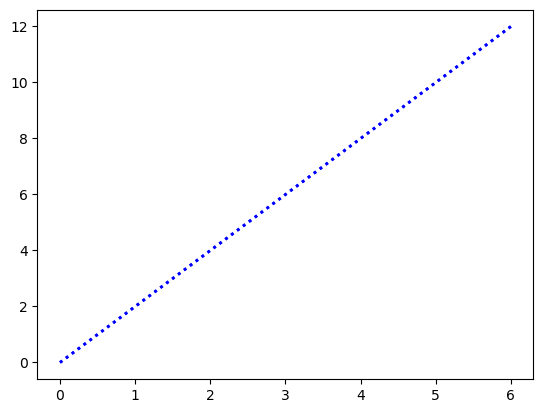

In [9]:
plt.plot(x, y_1, color='blue', linestyle = 'dotted', linewidth = 2)
plt.plot(x, y_1, c='blue', ls='dotted', lw=2)

- Jupyter is an interactive environment, so one will see an output even if `plt.show()` is omitted. However, it is good practice to still include this in ones code so it will work in non-interactive environments (e.g. IDLE shell).
  
- Linestyle, Linewidth and Color are optional arguments with default values for styling parameters. So, `plt.plot(x, y_1, y_2)` will still work.
  
- Order of **keyword argument** specification (`color`, `linewidth` etc.) does not matter.
  
- Arguments can be split into separate lines to improve readability, so the following will still work:

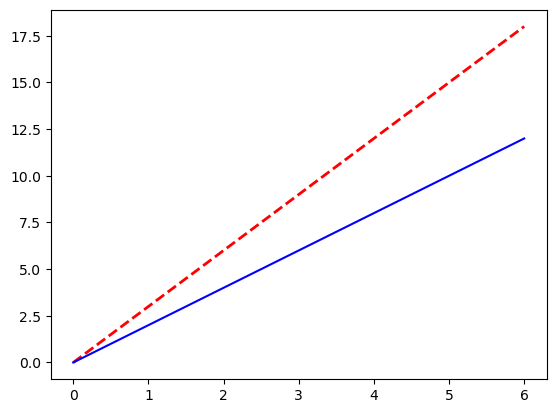

In [14]:
plt.plot(x, y_2, c='red', ls='dashed', lw=2)
plt.plot(x, y_1, label = "Y-values", color = 'blue')

## 1.2 Adding another plot

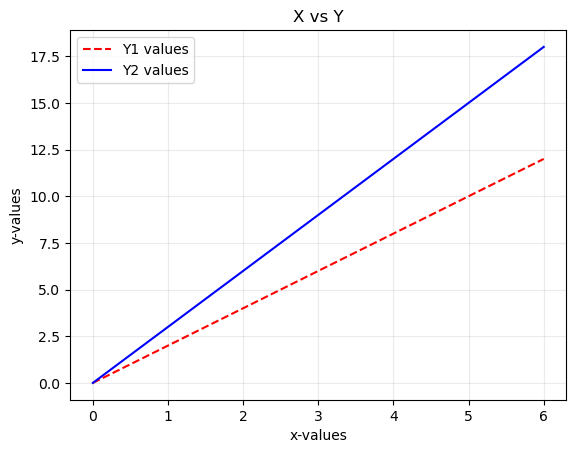

In [18]:
# Another plot can be added to include the data of y_2
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

# Lets start plotting
plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed')
plt.plot(x, y_2, label='Y2 values', color='blue')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

## 1.3 Yet another plot but with error bars

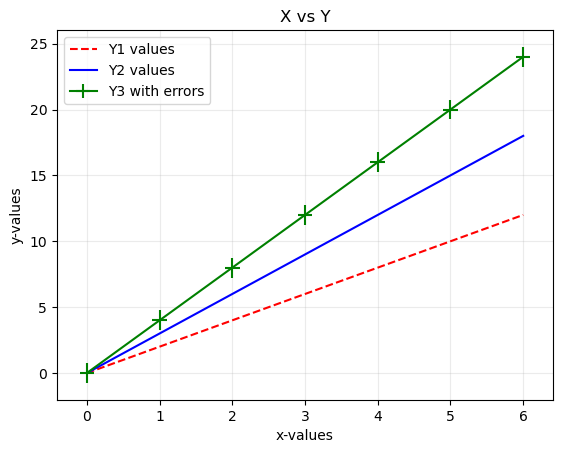

In [19]:
# This new plot includes the x and y error bars for the points. The plotting command
# to be used is called 'errorbar()'.

y_3 = [0, 4, 8, 12, 16, 20, 24]

# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]
y_3 = [0, 4, 8, 12, 16, 20, 24]
x_error, y_error = .1, 0.75

# Lets start plotting
plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed',)
plt.plot(x, y_2, label='Y2 values', color='blue', )
plt.errorbar(x, y_3, xerr=x_error, yerr=y_error,
             label='Y3 with errors', color='green')    # error_bar
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

# 2 Better with NumPy

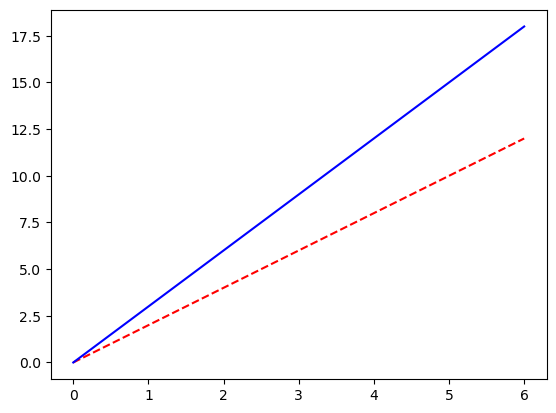

In [21]:
# It is usually easier to use NumPy arrays instead of Python lists.
# We first convert the lists into arrays then redo the plot in the previous step.

import numpy as np

# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

np_x = np.array(x)
np_y_1 = np.array(y_1)
np_y_2 = np.array(y_2)

plt.plot(np_x, np_y_1, color='red', linestyle='dashed', label='Y values')
plt.plot(np_x, np_y_2, color='blue', label='Y2 values')

## 2.1 Adding mathematical functions

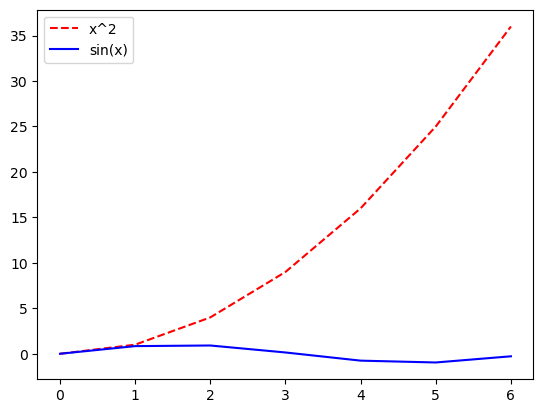

In [22]:
# One major advantage of NumPy arrays is that they allow one to generate data-related 
# math functions easily. Resuing our previous code to plot x^2 and sin(x):

x = np.array([0, 1, 2, 3, 4, 5, 6])

x2 = x**2                  # The math stuff
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed', )
plt.plot(x, sin_x, label='sin(x)',
         color='blue')
plt.legend()                                 

The issue with the above plot is that, since sin(x) lies between $\pm 1$, while $x^2$ has no bounds. The plot thus does not look good. One way to fix it is to add another y-axis that shares the same x-axis.

## We need another axis!

### Things to note

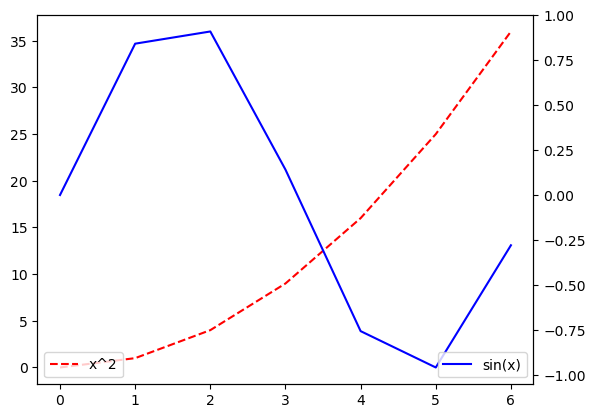

In [23]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2


There are now two `legend()` calls, one for each axis. <br><br>
Our plot still does not look good because there are only a few points involved when plotting both $sin(x)$ and $x^2$. We can fix this using the `np.linspace` function.

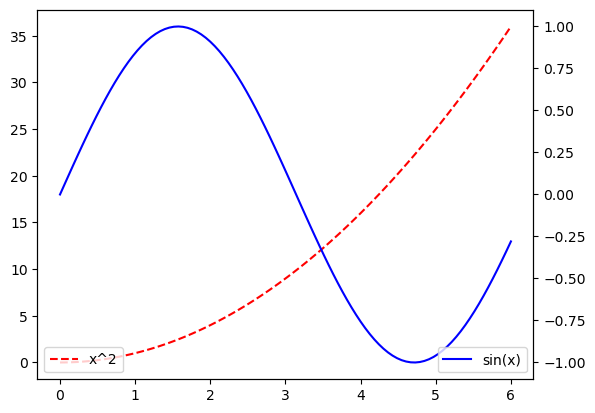

In [26]:
x = np.linspace(0, 6, 100)    # np.linspace function includes many more points
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2

# 3 Saving to disc

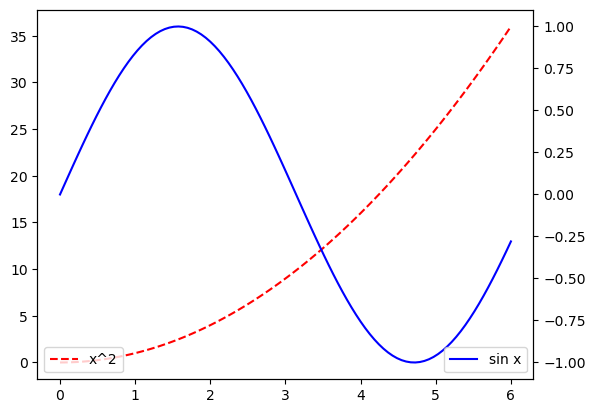

In [27]:
x = np.linspace(0, 6, 100)
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed')
plt.legend(loc='lower left')
plt.twinx()
plt.plot(x, sin_x,
         label='sin x', color='blue')
plt.legend(loc='lower right')

plt.savefig('simple-plot.png', dpi=150)

# Saves the plot to disk. 

matplotlib makes it easy to export plots into many formats (PDF, JPEG, PNG etc.) at different resolutions. <br>
- The function `savefig()` is used for this purpose.
- We specify the format with the extension of the file name (e.g. `filename.pdf`).
- We specify the resolution with the `dpi` variable (dots-per-inch).
<br>
The file will be saved in the same directory (folder) as the one the notebook is in. To save it elsewhere, we need to specify the path in detail:
```python
plt.savefig('C://Desktop/simple-plot.png', dpi=150)
```

# 4 A real example: Global Warming

## 4.1 Plotting data from files

Plotting data stored in a file (spreadsheet, textfile, database) is important.<br>
The dataset being used is from the **Berkeley Earth website** --> Global Warming --> Data Overview --> `Complete_TAVG_daily.txt`.

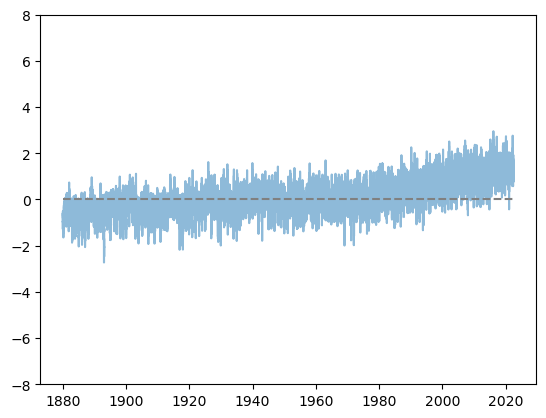

In [31]:
data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=24)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)  # small alpha value to soften the colour of the plot
plt.ylim([-8, 8])  # plot range is made symmetrical in the y-direction

plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
# Horizontal line is added at the 0 value to show the trend in data

## 4.2 Styles

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

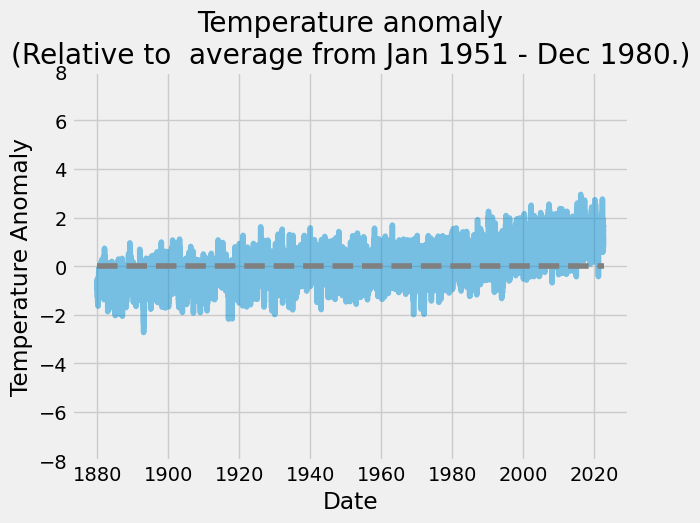

In [35]:
# matplotlib offers some standard style templates (e.g. fivethirtyeight)

plt.style.use('fivethirtyeight')

data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
plt.ylim([-8, 8])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

### xkcd!

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

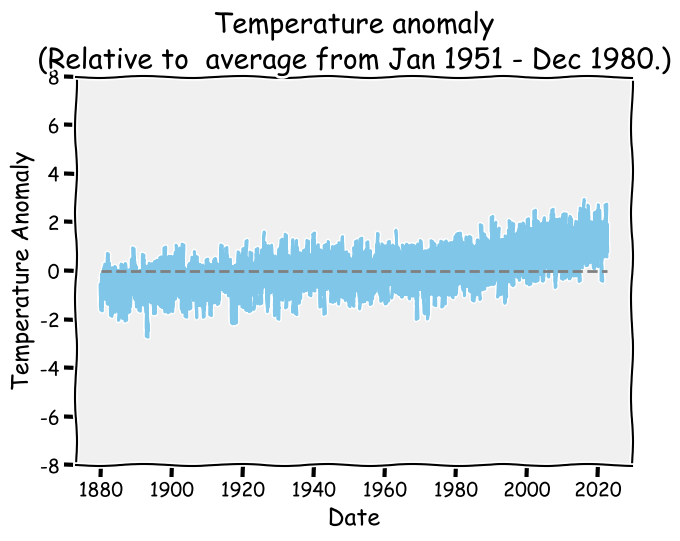

In [36]:
# Plot in xkcd style

plt.xkcd()

data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
plt.ylim([-8, 8])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

### Resetting style

In [38]:
# Use the following to reset to default style

plt.style.use('default')